In [ ]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key = '816cc02f28e04e22b0058f5f7e3543c3'

## search a bear

In [1]:
results = search_images_bing(key=key, term='grizzly bear', min_sz=150)
results

NameError: ignored

In [2]:
ims = results.attrgot('contentUrl')
len(ims)

NameError: ignored

In [ ]:
try:
  os.mkdir('images')
except:
  pass
dest = 'images/grizzly.jpg'
download_url(url=ims[0], dest=dest)

In [ ]:
im = Image.open(fp=dest)
im.to_thumb(128, 128)

# Classify 3 Bear Types

## Data

In [ ]:
bear_types = ['grizzly', 'black', 'teddy']
path = Path('bears')

In [ ]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = path/o
    dest.mkdir()
    results = search_images_bing(key=key, term=f'{o} bear')
    download_images(dest=dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#382) [Path('bears/grizzly/00000075.jpg'),Path('bears/grizzly/00000018.jpg'),Path('bears/grizzly/00000026.jpg'),Path('bears/grizzly/00000119.jpg'),Path('bears/grizzly/00000069.jpg'),Path('bears/grizzly/00000098.jpg'),Path('bears/grizzly/00000148.jpg'),Path('bears/grizzly/00000004.jpg'),Path('bears/grizzly/00000095.jpg'),Path('bears/grizzly/00000094.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#7) [Path('bears/grizzly/00000014.jpg'),Path('bears/grizzly/00000092.jpg'),Path('bears/black/00000145.jpg'),Path('bears/teddy/00000122.jpg'),Path('bears/teddy/00000033.jpg'),Path('bears/teddy/00000064.jpg'),Path('bears/teddy/00000125.jpg')]

In [ ]:
failed.map(Path.unlink)

(#7) [None,None,None,None,None,None,None]

## Data to DataLoaders

In [ ]:
# creating a datablock
# blocks=(indepvar, depvar)
# get_items=how to get file

bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = bears.dataloaders(path)

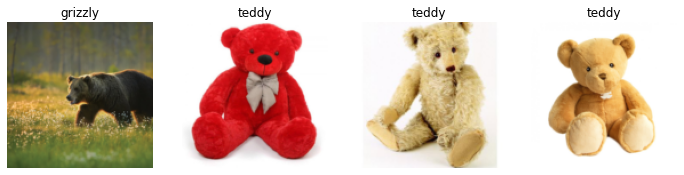

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

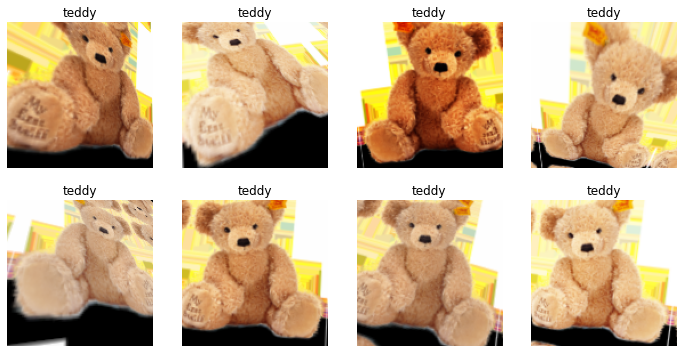

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Train

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.533660,0.621570,0.253333,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.227624,0.455444,0.173333,00:13
1,0.168979,0.322699,0.106667,00:13
2,0.134218,0.297033,0.133333,00:13
3,0.117958,0.320987,0.160000,00:12


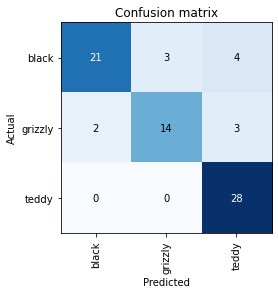

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

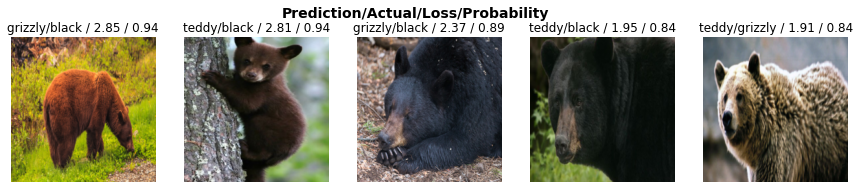

In [ ]:
interp.plot_top_losses(5, nrows=1)

# Classify Dog Breeds

In [ ]:
!rm -rf 'dogs'

dog_types = ['golden retriever', 'pug', 'chihuahua']
path = Path('dogs')

# get data from bing image search
if not path.exists():
  path.mkdir()
  for o in dog_types:
    dest = path/o
    dest.mkdir()
    results = search_images_bing(key, f'{o} dog')
    download_images(dest, urls=results.attrgot('contentUrl'))

# get rid unusable images
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

(#2) [None,None]

In [ ]:
get_image_files(path/'golden retriever')

(#143) [Path('dogs/golden retriever/00000075.jpg'),Path('dogs/golden retriever/00000018.jpg'),Path('dogs/golden retriever/00000026.jpg'),Path('dogs/golden retriever/00000149.jpg'),Path('dogs/golden retriever/00000069.jpg'),Path('dogs/golden retriever/00000076.jpeg'),Path('dogs/golden retriever/00000098.jpg'),Path('dogs/golden retriever/00000148.jpg'),Path('dogs/golden retriever/00000004.jpg'),Path('dogs/golden retriever/00000095.jpg')...]

In [ ]:
# turn into dataloaders
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=0),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = dogs.dataloaders(path)

In [ ]:
# train
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.999938,0.250644,0.093023,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.138729,0.154601,0.081395,00:12
1,0.096027,0.156627,0.058140,00:12
2,0.069920,0.207658,0.069767,00:12
3,0.056106,0.236432,0.069767,00:12


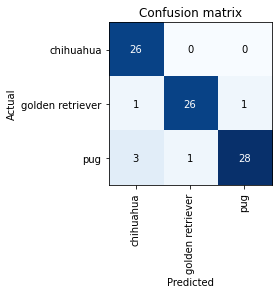

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn2 = cnn_learner(dls, resnet34, metrics=error_rate)
learn2.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.236924,0.073949,0.023256,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.150286,0.024875,0.011628,00:12
1,0.110275,0.092452,0.034884,00:12
2,0.073222,0.171571,0.058140,00:12
3,0.069868,0.159774,0.058140,00:12


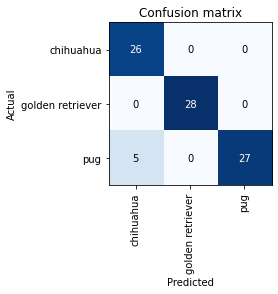

In [ ]:
interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix()

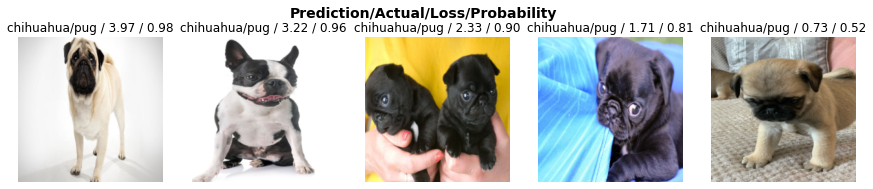

In [ ]:
interp2.plot_top_losses(5, nrows=1)

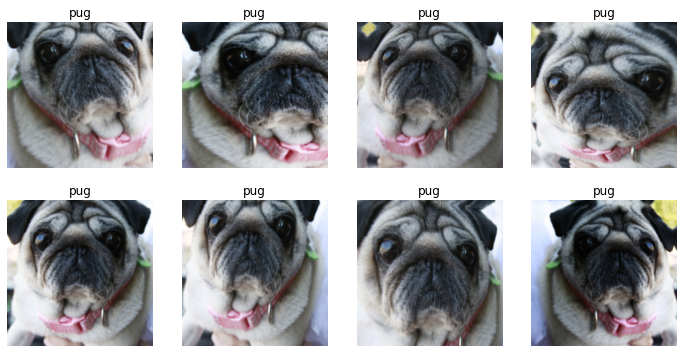

In [ ]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

# Classify Facial Expressions

In [ ]:
expressions = ['happy', 'sad', 'angry']

path = Path('expressions')
if not path.exists():
  path.mkdir()
  for o in expressions:
    dest = path/o
    dest.mkdir()
    results = search_images_bing(key, f'{o} face real person')
    download_images(dest, urls=results.attrgot('contentUrl'))

fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

(#1) [None]

In [ ]:
get_image_files(path)

(#401) [Path('expressions/sad/00000075.jpg'),Path('expressions/sad/00000018.jpg'),Path('expressions/sad/00000026.jpg'),Path('expressions/sad/00000119.jpg'),Path('expressions/sad/00000086.png'),Path('expressions/sad/00000054.png'),Path('expressions/sad/00000098.jpg'),Path('expressions/sad/00000131.png'),Path('expressions/sad/00000148.jpg'),Path('expressions/sad/00000004.jpg')...]

In [ ]:
exp = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.2, 0),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = exp.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet152, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.836873,3.021292,0.637500,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.259103,1.443756,0.537500,00:14
1,1.080808,1.777375,0.562500,00:14
2,0.898954,1.690599,0.512500,00:14
3,0.761538,1.751582,0.500000,00:14


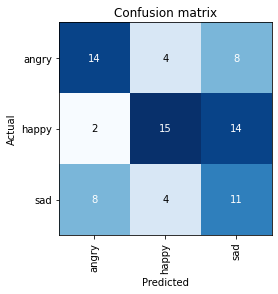

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

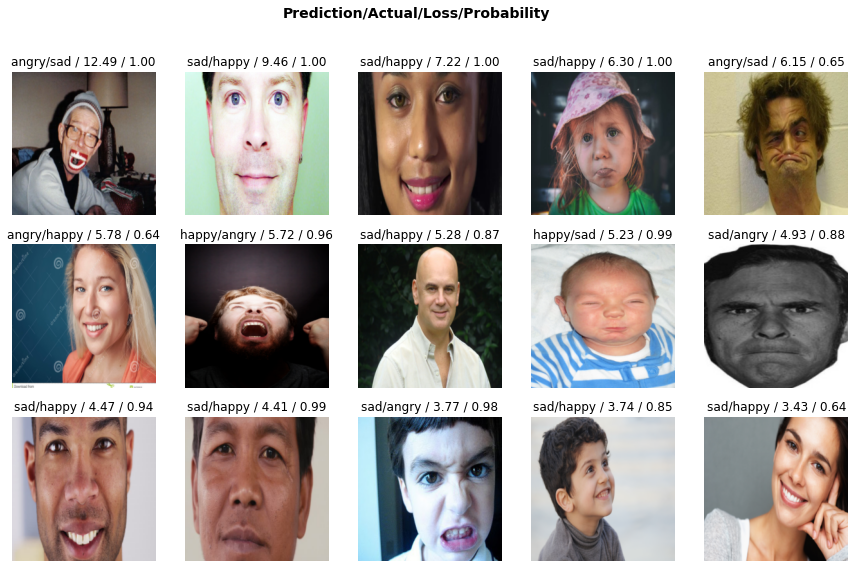

In [ ]:
interp.plot_top_losses(15)

# Classify Template

epoch,train_loss,valid_loss,error_rate,time
0,1.483071,0.483532,0.175000,00:23


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.316498,0.287302,0.087500,00:23
1,0.209945,0.271198,0.087500,00:23
2,0.147515,0.195251,0.050000,00:24
3,0.115541,0.175122,0.050000,00:24


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

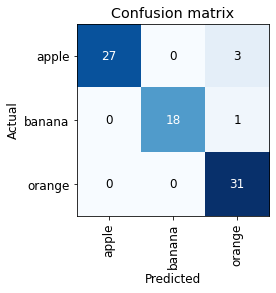

In [ ]:
!rm -rf {category_name}
category_name = 'fruits'
category = ['apple', 'orange', 'banana']
search = 'fruit'

path = Path(category_name)
if not path.exists():
  path.mkdir()
  for o in category:
    dest = path/o
    dest.mkdir()
    results = search_images_bing(key, f'{o} {search}')
    download_images(dest, urls=results.attrgot('contentUrl'))

fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

exp = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.2, 0),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = exp.dataloaders(path)

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

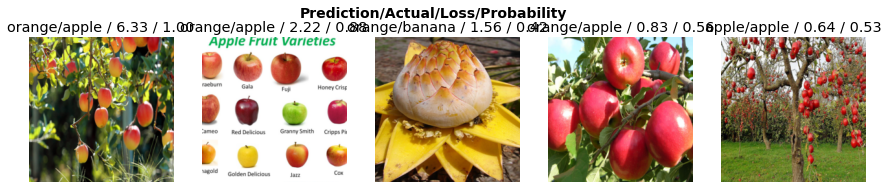

In [ ]:
interp.plot_top_losses(5, nrows=1)
# cleaner = ImageClassifierCleaner(learn)
# cleaner